In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
train=pd.read_csv("data/Train.csv")
test=pd.read_csv("data/Test.csv")

In [41]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [42]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [43]:
train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [44]:
#converting into numpy array
train=train.values
test=test.values

In [45]:
m=train.shape[1] #number of columns
train_x=train[:,0:m-1]
train_y=train[:,m-1:m]

In [46]:
print(train_x)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [47]:
print(train_y)

[[ -82.15466656]
 [ -48.89796018]
 [  77.2703707 ]
 ...
 [-107.51050797]
 [ -47.34155781]
 [-115.93900296]]


In [48]:
test_x=test

In [49]:
mean_train=np.mean(train_x,axis=0)
mean_test=np.mean(test_x,axis=0)

std_train=np.std(train_x,axis=0)
std_test=np.std(test_x,axis=0)
print(mean_train,mean_test)


#normalising thee data
train_x=(train_x-mean_train)/std_train
test_x=(test_x-mean_test)/std_test


#adding fake feature at 0th column
new_col=[[1] for i in range(train_x.shape[0])]
new_col=np.array(new_col)
train_x=np.append(new_col,train_x,axis=1)


new_col=[[1] for i in range(test_x.shape[0])]
new_col=np.array(new_col)
test_x=np.append(new_col,test_x,axis=1)

[ 0.0041143  -0.0276038  -0.04445943 -0.04240792  0.01200535] [-0.02180443 -0.01280597 -0.0109882  -0.03486353  0.03101649]


In [50]:
print(train_x,test_x)

[[ 1.          0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448]
 [ 1.         -0.84270473 -0.15822922 -0.72365639 -0.99464217  0.59896038]
 [ 1.          0.23300381  0.15706968 -0.10209444  0.72994655 -0.20378187]
 ...
 [ 1.          1.0431652  -0.8532941   1.75476416 -1.79830858  0.44004223]
 [ 1.         -1.27708547  0.02207793  1.88059294 -1.0207355   0.74035908]
 [ 1.         -1.89374689 -0.80456069 -1.39187219  0.52221049  1.47960738]] [[ 1.          1.06045325  2.04744832 -0.24549091 -2.30661408 -1.08034112]
 [ 1.         -0.36118497  0.94676928  0.61285352  0.71550489 -0.41280281]
 [ 1.         -1.02526649  0.95638073 -0.38148304 -1.76769893  0.45304559]
 ...
 [ 1.          0.58953804  1.74561022 -0.85223715 -1.1215471   0.33060786]
 [ 1.         -1.64158344  0.85198015  0.01001627  0.64289734  0.4511026 ]
 [ 1.          0.16474952  0.53357066 -0.80929835  0.06441606  1.79844429]]


In [51]:
def error(Y_,Y):
    m=Y.shape[0]
    return np.sum((Y_-Y)**2)/m

In [52]:
#for ith example ,it will return yi= F(Xi)
def hypothesis(X,theta):     
    x=np.dot(X,np.transpose(theta))
    return x

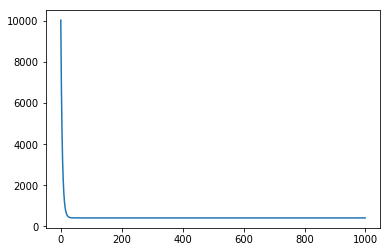

In [53]:
def gradient(X,Y,theta):
    Y_=hypothesis(X,theta)
    m=Y.shape[0]
    return np.transpose(np.dot(np.transpose(X),(Y_-Y)))/m


def gradient_descent(X,Y,maximum_epoch=300,learning_rate=0.1):
    m=X.shape[1] #number of features
    theta=[[0 for i in range(m)]]
    theta=np.array(theta)
    error_list=[]

    for i in range(maximum_epoch):
        grad=gradient(X,Y,theta)
        #print(gradient(X,Y,theta))
        theta=theta-learning_rate*grad
        Y_=hypothesis(X,theta)
        e=error(Y_,Y)
        error_list.append(e)
    return error_list,theta


error_list,theta=gradient_descent(train_x,train_y,1000)

plt.plot(error_list)
plt.show()

In [54]:
print(error_list)

[10026.033684143073, 8217.055252817618, 6749.466627013953, 5558.673187089289, 4592.334067473993, 3808.0315657917154, 3171.3849608951386, 2654.5237799458373, 2234.85183834815, 1894.04653113265, 1617.2484830009762, 1392.4052530232816, 1209.739731393694, 1061.3194764678276, 940.7077762355074, 842.6808858642622, 762.9988586786468, 698.2197865343775, 645.5492057333445, 602.7179942368197, 567.8833559297996, 539.5485154072412, 516.4975785302777, 497.742687289827, 482.4811425919415, 470.06060992121974, 459.95088023812474, 451.7209479296336, 445.0204021068502, 439.5643175010901, 435.1209851248121, 431.5019475920107, 428.5539050830668, 426.15213988278555, 424.1951738531029, 422.6004270672911, 421.3006895139443, 420.2412532069083, 419.3775807751254, 418.67340992065016, 418.0992120500356, 417.6309387353912, 417.24900212055684, 416.9374455012189, 416.683268518204, 416.475878069587, 416.30664146076737, 416.16852270834255, 416.0557864849475, 415.96375709353566, 415.8886222169001, 415.8272731038045, 4

In [55]:
test_y=hypothesis(test_x,theta)

In [56]:
print(test_y)

[[ 115.77102898]
 [ 115.92990429]
 [ -22.04992841]
 [ -46.46177563]
 [ -97.38666201]
 [ -45.56987741]
 [ -78.52398889]
 [  22.58739877]
 [ 171.63277442]
 [ 171.9537867 ]
 [-106.75969314]
 [ -21.49855929]
 [  -5.63390495]
 [ 121.63043509]
 [  40.28362836]
 [  44.00324667]
 [-189.69389728]
 [  22.3692861 ]
 [   9.5501096 ]
 [ 135.95267689]
 [  64.00495782]
 [ -63.43853793]
 [-109.97163918]
 [  -9.01511801]
 [ -59.44971651]
 [  11.48620265]
 [  29.1280994 ]
 [ 107.30045716]
 [  22.78080326]
 [ -28.18622904]
 [ 110.76411724]
 [ -46.55346264]
 [ 215.64913943]
 [ -15.33507724]
 [-230.44255151]
 [ 152.67119041]
 [  -1.93505646]
 [  11.72826448]
 [-310.39642186]
 [  77.20443873]
 [ -82.46548856]
 [-208.50076697]
 [-239.13473922]
 [ 132.30133266]
 [ -76.6368075 ]
 [ 104.29387037]
 [  -4.87459801]
 [  19.79798391]
 [ -98.55955087]
 [ -28.62096401]
 [   9.87429842]
 [-176.20331178]
 [  64.86643677]
 [ -97.39953483]
 [-108.60150727]
 [-155.45277636]
 [  59.65923743]
 [ 109.33942529]
 [ -75.4695941

In [57]:
#calcu
def r2_score(Y,Y_):
    num=np.sum((Y-Y_)**2)
    den=np.sum((Y-Y.mean())**2)
    score=1-(num/den)
    return score*100

In [58]:
print(r2_score(train_y,hypothesis(train_x,theta)))

96.60939669975616


In [59]:
# x=[
#     [1,2],
#     [3,4]
# ]
# y=[[5,6]]

# x=np.array(x)
# y=np.array(y)
# print(hypothesis(x,y))

In [60]:
print(test_y)

[[ 115.77102898]
 [ 115.92990429]
 [ -22.04992841]
 [ -46.46177563]
 [ -97.38666201]
 [ -45.56987741]
 [ -78.52398889]
 [  22.58739877]
 [ 171.63277442]
 [ 171.9537867 ]
 [-106.75969314]
 [ -21.49855929]
 [  -5.63390495]
 [ 121.63043509]
 [  40.28362836]
 [  44.00324667]
 [-189.69389728]
 [  22.3692861 ]
 [   9.5501096 ]
 [ 135.95267689]
 [  64.00495782]
 [ -63.43853793]
 [-109.97163918]
 [  -9.01511801]
 [ -59.44971651]
 [  11.48620265]
 [  29.1280994 ]
 [ 107.30045716]
 [  22.78080326]
 [ -28.18622904]
 [ 110.76411724]
 [ -46.55346264]
 [ 215.64913943]
 [ -15.33507724]
 [-230.44255151]
 [ 152.67119041]
 [  -1.93505646]
 [  11.72826448]
 [-310.39642186]
 [  77.20443873]
 [ -82.46548856]
 [-208.50076697]
 [-239.13473922]
 [ 132.30133266]
 [ -76.6368075 ]
 [ 104.29387037]
 [  -4.87459801]
 [  19.79798391]
 [ -98.55955087]
 [ -28.62096401]
 [   9.87429842]
 [-176.20331178]
 [  64.86643677]
 [ -97.39953483]
 [-108.60150727]
 [-155.45277636]
 [  59.65923743]
 [ 109.33942529]
 [ -75.4695941

In [61]:
np.savetxt("foo.csv", test_y, delimiter=",",index=True)

TypeError: savetxt() got an unexpected keyword argument 'index'

In [62]:
df = pd.DataFrame(data = test_y,  
                    columns=["target"]
                  ) 

In [63]:
df.index.names = ['Id']

In [64]:
df.head()

,target
Id,
0,115.771029
1,115.929904
2,-22.049928
3,-46.461776
4,-97.386662


In [66]:
df.to_csv('test_y.csv')